In [1]:
import pandas as pd
pd.options.display.max_rows= 200
pd.options.display.max_columns = 200

In [2]:
df_gini = pd.read_csv("data/gini.csv")

In [3]:
df_gpg = pd.read_csv("data/gpg.csv")

In [4]:
df_gini.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,GINI,INEQ,A,2012,0.326,NaN
1,AUS,INCOMEINEQ,GINI,INEQ,A,2014,0.337,NaN
2,AUS,INCOMEINEQ,GINI,INEQ,A,2016,0.330,NaN
3,AUT,INCOMEINEQ,GINI,INEQ,A,2007,0.284,NaN
4,AUT,INCOMEINEQ,GINI,INEQ,A,2008,0.281,NaN


In [5]:
df_gpg.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WAGEGAP,EMPLOYEE,PC,A,2005,15.777778,NaN
1,AUS,WAGEGAP,EMPLOYEE,PC,A,2006,16.666667,NaN
2,AUS,WAGEGAP,EMPLOYEE,PC,A,2007,15.400000,NaN
3,AUS,WAGEGAP,EMPLOYEE,PC,A,2008,11.937378,NaN
4,AUS,WAGEGAP,EMPLOYEE,PC,A,2009,16.363636,NaN


In [6]:
df_gini.drop(['INDICATOR', "MEASURE", "FREQUENCY", "Flag Codes", "SUBJECT"], axis=1, inplace=True)

In [7]:
df_gpg.drop(['INDICATOR', "MEASURE", "FREQUENCY", "Flag Codes", "SUBJECT"], axis=1, inplace=True)

In [8]:
df_gini.columns = map(str.lower, df_gini.columns)

In [9]:
df_gpg.columns = map(str.lower, df_gpg.columns)

In [10]:
df_gpg = df_gpg.rename(columns={"value": "gender_pay_gap"})

In [11]:
df_gini = df_gini.rename(columns={"value": "gini"})

In [12]:
df_gini

,location,time,gini
0,AUS,2012,0.326
1,AUS,2014,0.337
2,AUS,2016,0.330
3,AUT,2007,0.284
4,AUT,2008,0.281
...,...,...,...
299,LTU,2012,0.350
300,LTU,2013,0.352
301,LTU,2014,0.381
302,LTU,2015,0.372


In [18]:
df = pd.merge(left=df_gpg, right=df_gini, how='left', left_on=('location', 'time'), right_on=('location', 'time'))

In [20]:
df.head()

,location,time,gender_pay_gap,gini
0,AUS,2005,15.777778,NaN
1,AUS,2006,16.666667,NaN
2,AUS,2007,15.400000,NaN
3,AUS,2008,11.937378,NaN
4,AUS,2009,16.363636,NaN


In [25]:
df.groupby(['location']).count()

,time,gender_pay_gap,gini
location,,,
AUS,14,14,3
AUT,13,13,10
BEL,12,12,12
CAN,14,14,13
CHE,6,6,5
CHL,6,6,5
CZE,14,14,12
DEU,13,13,7
DNK,13,13,6


In [26]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

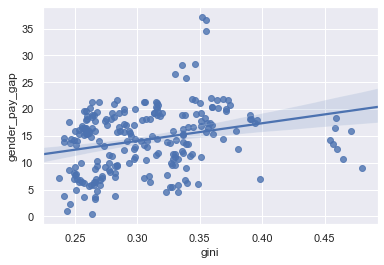

In [37]:
ax = sns.regplot(x="gini", y="gender_pay_gap", data=df)